## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Extração Dataset

In [3]:
filepath = '../data/raw/ecommerce-dataset.xlsx'
df = pd.read_excel(filepath, sheet_name="E Comm")

In [ ]:
df.head()

## Divisão Treino e Teste

In [ ]:
x = df.loc[:, ~df.columns.isin(['Churn', 'CustomerID'])]
y = df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Merge

In [ ]:
train = x_train.merge(y_train, left_index=True, right_index=True)
test = x_test.merge(y_test, left_index=True, right_index=True)

## Análise Exploratória (EDA) E Preparação dos Dados


In [ ]:
x_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

In [ ]:
y_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

In [ ]:
# VERIFICAR TIPO DOS DADOS
pd.DataFrame({'train': x_train.dtypes, 'test': x_test.dtypes})

In [ ]:
# calcula a proporção de dados nulos em relação a quantidade total dos dados
pd.DataFrame ({'train': round(100*(x_train.isnull().sum()/x_train.count()), 2),
              'test': round(100*(x_test.isnull().sum()/x_test.count()), 2)})

## Análise Individual das Features

### Churn

In [11]:
y_train.isnull().sum(), y_test.isnull().sum()

(Churn    0
 dtype: int64,
 Churn    0
 dtype: int64)

In [12]:
y_train.value_counts()

Churn
0        3272
1         669
Name: count, dtype: int64

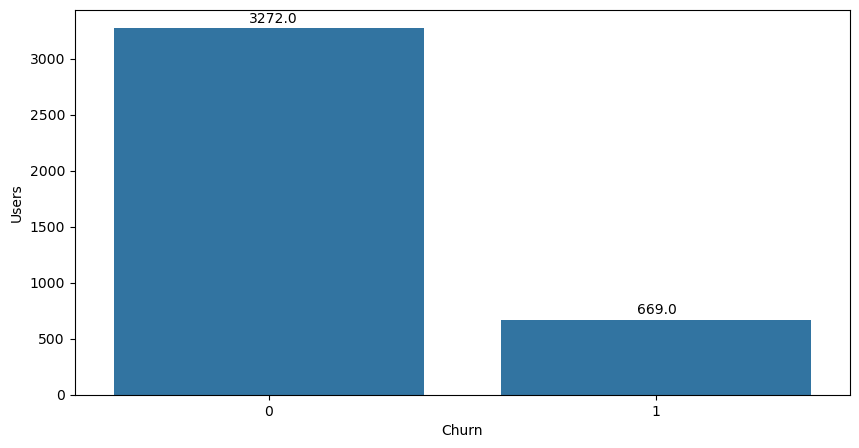

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=y_train, x='Churn')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))
plt.ylabel('Users')
plt.show()

In [23]:
## Substituir nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

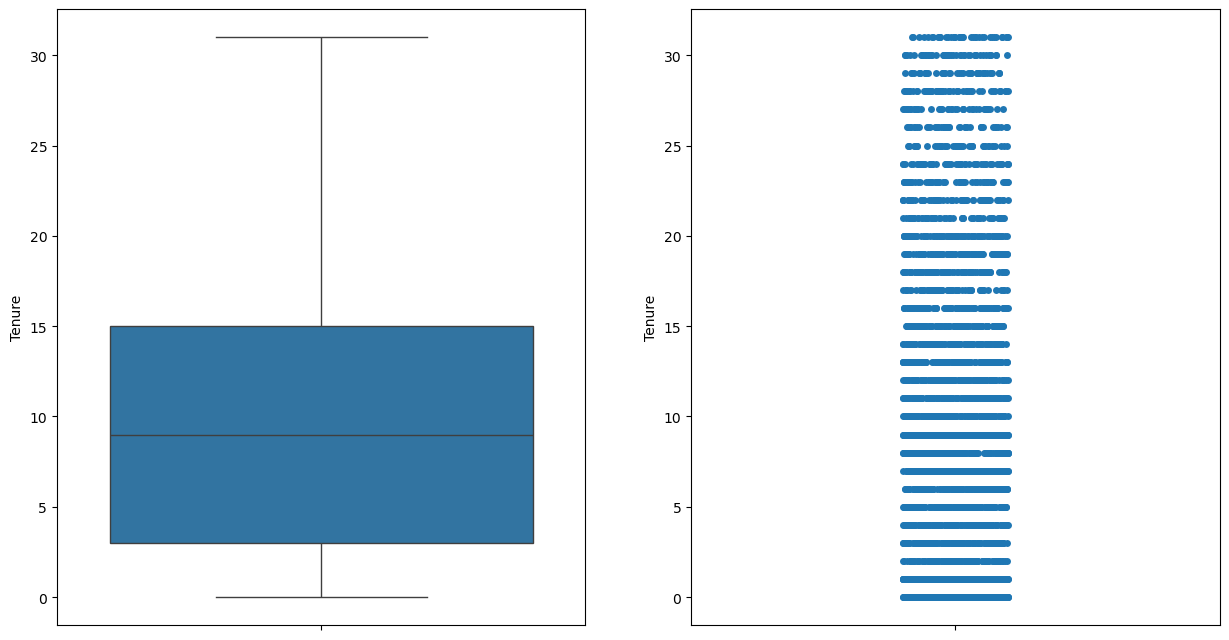

In [24]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

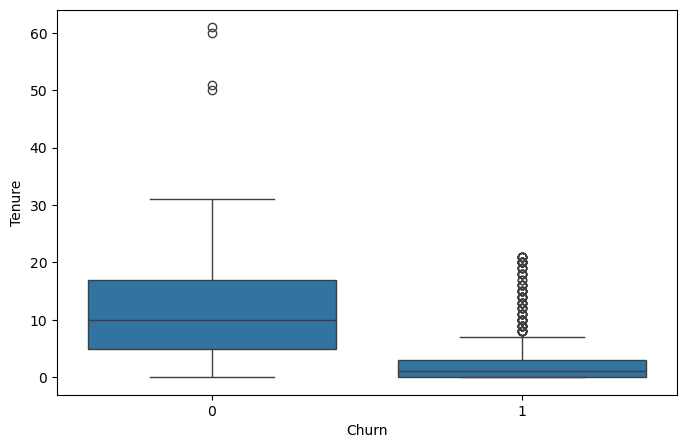

In [25]:
## verificar a correlação entre churn e tenure.

plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['Tenure'])
plt.show()

## pode-se observar que os usuários que não deram churn costumam ter mais tempo de casa. 
## Enquanto quem deu churn tem até 10 meses de casa

### Tenure
O tempo que o usuário está na organização (em meses)

Informações: 
Variável numérica discreta

In [14]:
x_train['Tenure'].isnull().sum(), x_test['Tenure'].isnull().sum()

(198, 66)

In [15]:
x_train['Tenure'].head()

2884    19.0
3004    13.0
3124     5.0
5279    12.0
2868    20.0
Name: Tenure, dtype: float64

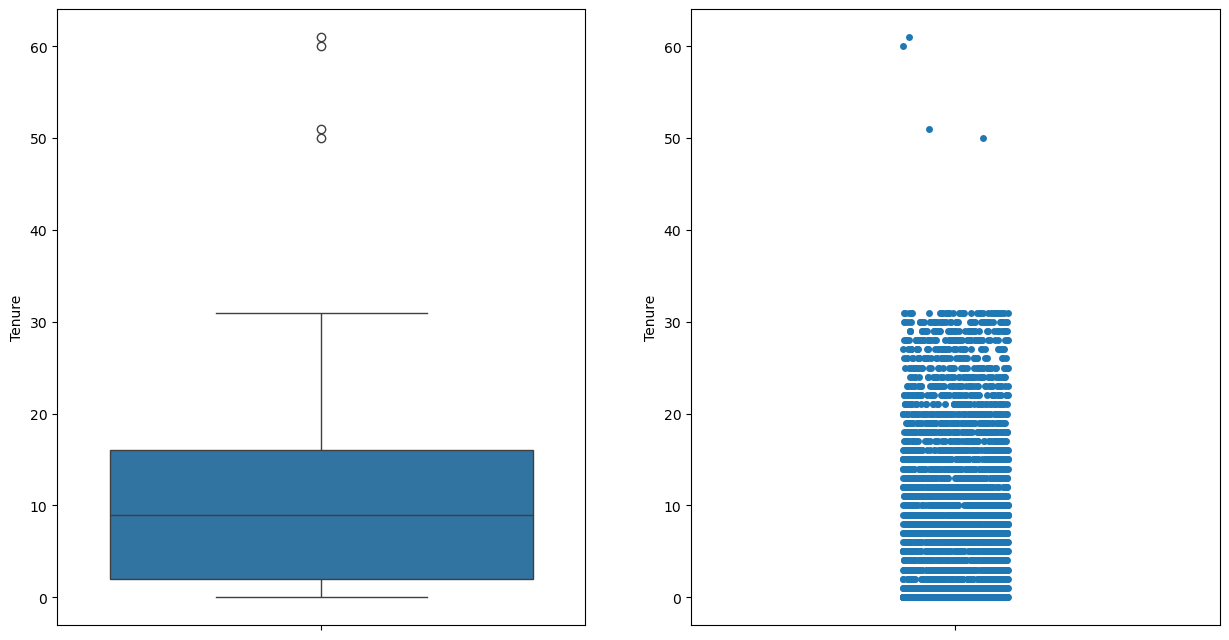

In [16]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [17]:
x_train['Tenure'].sort_values(ascending=False)
## Nesse caso, há dois valores categorizados como outliers: 60 e 50

5534    61.0
2719    60.0
3743    51.0
928     50.0
4223    31.0
        ... 
115      NaN
100      NaN
2122     NaN
2042     NaN
2760     NaN
Name: Tenure, Length: 3941, dtype: float64

In [18]:
x_test['Tenure'].sort_values(ascending=False)
## Nesse caso, há dois valores categorizados como outliers: 61 e 51

2915    31.0
3433    31.0
3628    31.0
5039    31.0
3364    31.0
        ... 
1377     NaN
2611     NaN
898      NaN
737      NaN
2160     NaN
Name: Tenure, Length: 1689, dtype: float64

In [19]:
# A abordagem será atribuir a esses outliers o valor máximo encontrado: 31

x_train['Tenure'] = np.where(x_train['Tenure'] > 31, 31, x_train['Tenure'])
x_test['Tenure'] = np.where(x_test['Tenure'] > 31, 31, x_test['Tenure'])

In [20]:
## Dados nulos

# Tratar dados nulos substituindo pela mediana
x_train['Tenure'].median()

9.0

In [21]:
x_train[x_train['Tenure'].isnull()==True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
387,NaN,Phone,1,9.0,CC,Male,2.0,4,Mobile,2,Single,1,0,13.0,0.0,1.0,1.0,120.45
1196,NaN,Phone,1,15.0,Debit Card,Female,3.0,3,Mobile,3,Single,5,0,12.0,1.0,2.0,0.0,121.05
1497,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Married,3,1,20.0,0.0,4.0,5.0,123.06
258,NaN,Phone,1,17.0,CC,Female,2.0,3,Mobile,4,Divorced,2,0,13.0,1.0,1.0,2.0,122.44
1821,NaN,Phone,1,23.0,UPI,Male,3.0,4,Mobile,4,Married,2,0,21.0,1.0,1.0,0.0,121.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,Phone,1,6.0,CC,Female,3.0,3,Mobile,3,Married,8,0,14.0,0.0,1.0,2.0,122.32
100,NaN,Phone,1,9.0,Debit Card,Male,3.0,4,Mobile,2,Divorced,4,0,17.0,0.0,1.0,0.0,121.77
2122,NaN,Mobile Phone,1,16.0,Debit Card,Female,2.0,4,Mobile Phone,5,Single,2,0,13.0,0.0,1.0,0.0,114.16
2042,NaN,Computer,3,26.0,Cash on Delivery,Female,2.0,3,Mobile,1,Married,2,0,15.0,0.0,1.0,2.0,121.57


In [22]:
x_test[x_test['Tenure'].isnull()==True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1387,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,0.0,1.0,1.0,122.93
2322,NaN,Computer,1,32.0,Cash on Delivery,Female,3.0,4,Mobile,3,Married,2,0,20.0,1.0,1.0,0.0,120.29
2237,NaN,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
644,NaN,Computer,1,6.0,CC,Female,3.0,4,Mobile,3,Married,2,0,13.0,1.0,1.0,3.0,120.07
1303,NaN,Phone,3,6.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,0.0,2.0,2.0,122.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,NaN,Phone,1,15.0,CC,Male,2.0,4,Mobile,3,Single,2,0,13.0,0.0,1.0,8.0,122.06
2611,NaN,Phone,1,15.0,Debit Card,Male,3.0,3,Mobile,5,Married,2,0,20.0,0.0,1.0,4.0,122.89
898,NaN,Phone,1,6.0,Debit Card,Female,2.0,3,Mobile,5,Divorced,3,0,22.0,1.0,1.0,0.0,120.66
737,NaN,Computer,1,23.0,Debit Card,Male,3.0,5,Mobile,3,Single,3,0,13.0,1.0,1.0,0.0,122.90


In [23]:
## Substituir nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

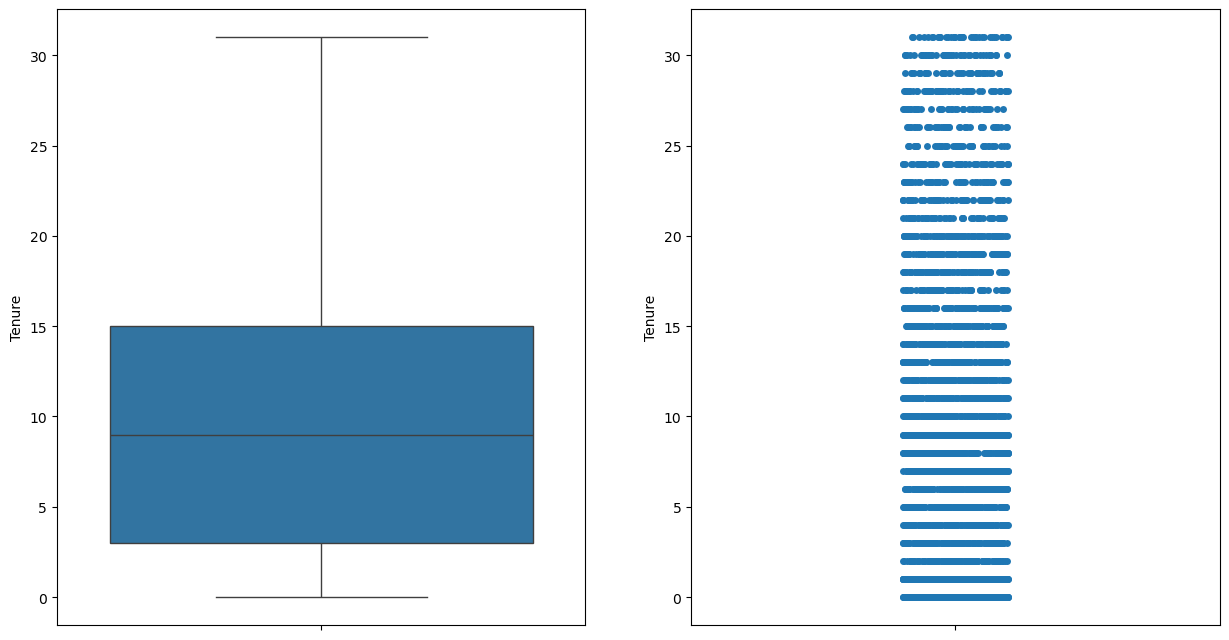

In [24]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

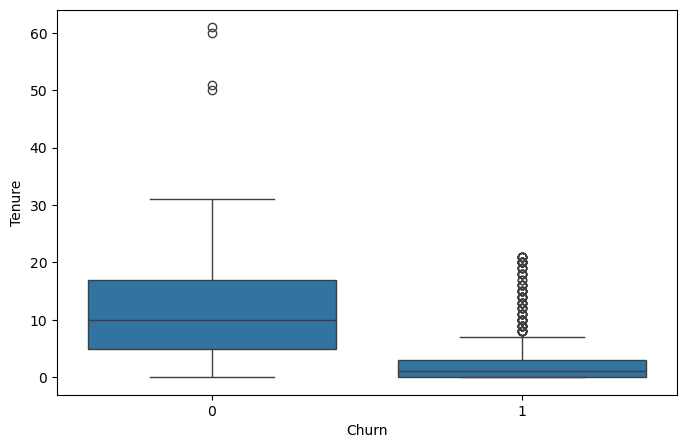

In [25]:
## verificar a correlação entre churn e tenure.

plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['Tenure'])
plt.show()

## pode-se observar que os usuários que não deram churn costumam ter mais tempo de casa. 
## Enquanto quem deu churn tem até 10 meses de casa

In [26]:
#correlação de pirsen
#-1 a 1 
# 0: não há correlação entre as variáveis

# 1: correlação positiva perfeita (quando uma cresce, a outra cresce tb)
# -1: correlação negativa (quando uma cresce, a outra decresce)


train[['Tenure', 'Churn']].corr()
## Baseado no resultado, quanto mais tempo de casa, menos provável de ser um possível churn

,Tenure,Churn
Tenure,1.000000,-0.349023
Churn,-0.349023,1.000000


### PreferredLoginDevice

Variável categórica nominal

In [27]:
x_train['PreferredLoginDevice'].isnull().sum(), x_test['PreferredLoginDevice'].isnull().sum()

(0, 0)

In [28]:
x_train['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    1900
Computer        1166
Phone            875
Name: count, dtype: int64

In [29]:
x_train['PreferredLoginDevicemobilePhone'] = np.where(x_train['PreferredLoginDevice'] == "Mobile Phone", 1, 0)
x_train['PreferredLoginDevice_computer'] = np.where(x_train['PreferredLoginDevice'] == "Computer", 1, 0)
x_train['PreferredLoginDevice_Phone'] = np.where(x_train['PreferredLoginDevice'] == "Phone", 1, 0)
x_train.drop(columns = ['PreferredLoginDevice'], inplace=True)

In [30]:
x_test['PreferredLoginDevice_mobilePhone'] = np.where(x_test['PreferredLoginDevice'] == "Mobile Phone", 1, 0)
x_test['PreferredLoginDevice_computer'] = np.where(x_test['PreferredLoginDevice'] == "Computer", 1, 0)
x_test['PreferredLoginDevice_Phone'] = np.where(x_test['PreferredLoginDevice'] == "Phone", 1, 0)
x_test.drop(columns = ['PreferredLoginDevice'], inplace=True)

### CityTier

Qual a faixa de desenvolvimento em que a cidade se encontra

Variável numérica ordinal

In [31]:
x_train['CityTier'].isnull().sum(), x_test['CityTier'].isnull().sum()

(0, 0)

In [32]:
x_train['CityTier'].value_counts()

CityTier
1    2593
3    1177
2     171
Name: count, dtype: int64

### WarehouseToHome
Distância entre o armazém e a cada do cliente

In [33]:
x_train['WarehouseToHome'].isnull().sum(), x_test['WarehouseToHome'].isnull().sum()

(186, 65)

In [34]:
## Substituição dos dados nulos pela mediana
x_train['WarehouseToHome'].median()

14.0

In [35]:
x_train['WarehouseToHome'] = x_train['WarehouseToHome'].fillna(x_train['WarehouseToHome'].median())
x_test['WarehouseToHome'] = x_test['WarehouseToHome'].fillna(x_test['WarehouseToHome'].median())

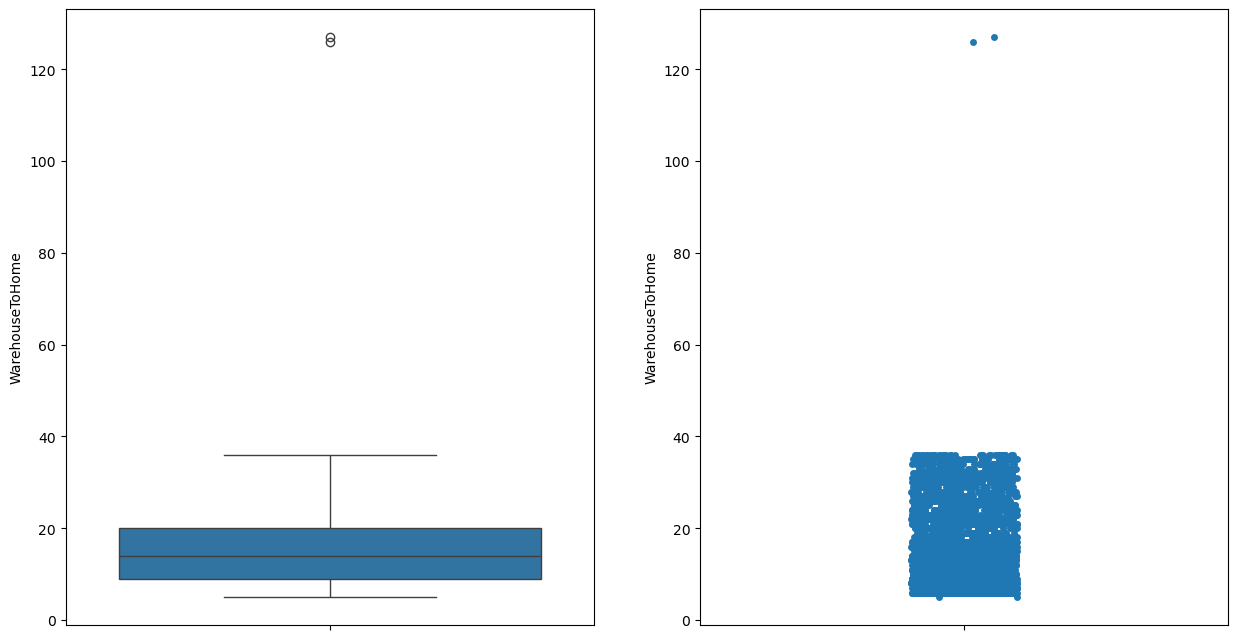

In [36]:
## Análise dos outliers

fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['WarehouseToHome'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['WarehouseToHome'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [37]:
x_train['WarehouseToHome'].sort_values(ascending=False)

4124    127.0
1309    126.0
5434     36.0
4301     36.0
5197     36.0
        ...  
1623      6.0
1809      6.0
1405      6.0
2151      5.0
1776      5.0
Name: WarehouseToHome, Length: 3941, dtype: float64

In [38]:
x_test['WarehouseToHome'].sort_values(ascending=False)

4431    36.0
4359    36.0
3150    36.0
4984    36.0
5025    36.0
        ... 
2201     5.0
451      5.0
1001     5.0
3490     5.0
201      5.0
Name: WarehouseToHome, Length: 1689, dtype: float64

In [39]:
# substituir outliers pelo numero que parece ser o correto 

x_train['WarehouseToHome'] = x_train['WarehouseToHome'].replace(127, 17).replace(126, 16)

In [40]:
x_test['WarehouseToHome'].sort_values(ascending=False)

4431    36.0
4359    36.0
3150    36.0
4984    36.0
5025    36.0
        ... 
2201     5.0
451      5.0
1001     5.0
3490     5.0
201      5.0
Name: WarehouseToHome, Length: 1689, dtype: float64

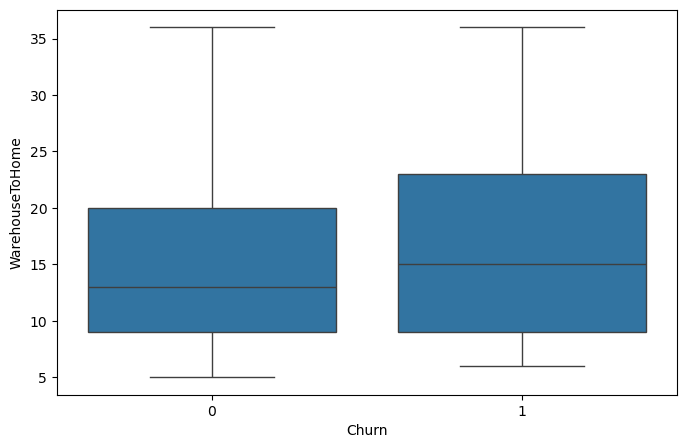

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['WarehouseToHome'], showfliers=False)
plt.show()

In [42]:
train[['Churn', 'WarehouseToHome']].corr()

,Churn,WarehouseToHome
Churn,1.000000,0.068484
WarehouseToHome,0.068484,1.000000


### PreferredPaymentMethod

método de pagamento preferido do cliente

Variável categórica nominal

In [43]:
x_train['PreferredPaymentMode'].isnull().sum(), x_test['PreferredPaymentMode'].isnull().sum()

(0, 0)

In [44]:
x_train['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          1657
Credit Card         1040
E wallet             419
UPI                  280
COD                  240
CC                   194
Cash on Delivery     111
Name: count, dtype: int64

In [45]:
x_train['PreferredPaymentMode_Debit'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Debit Card" else 0)
x_train['PreferredPaymentMode_Credit'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Credit Card" else 0)
x_train['PreferredPaymentMode_Ewallet'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "E wallet" else 0)
x_train['PreferredPaymentMode_UPI'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "UPI" else 0)
x_train['PreferredPaymentMode_COD'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "COD" else 0)
x_train['PreferredPaymentMode_CC'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "CC" else 0)
x_train['PreferredPaymentMode_Cash'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Cash on Delivery" else 0)
x_train.drop(columns = ['PreferredPaymentMode'], inplace=True)

In [46]:
x_test['PreferredPaymentMode_Debit'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Debit Card" else 0)
x_test['PreferredPaymentMode_Credit'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Credit Card" else 0)
x_test['PreferredPaymentMode_Ewallet'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "E wallet" else 0)
x_test['PreferredPaymentMode_UPI'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "UPI" else 0)
x_test['PreferredPaymentMode_COD'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "COD" else 0)
x_test['PreferredPaymentMode_CC'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "CC" else 0)
x_test['PreferredPaymentMode_Cash'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Cash on Delivery" else 0)
x_test.drop(columns = ['PreferredPaymentMode'], inplace=True)

### Gender

variável categórica nominal

In [47]:
x_train['Gender'].isnull().sum(), x_test['Gender'].isnull().sum()

(0, 0)

In [48]:
x_train['Gender'].value_counts()

Gender
Male      2372
Female    1569
Name: count, dtype: int64

In [49]:
x_train['Gender'] = x_train['Gender'].apply(lambda x: 1 if x == "Male" else 0)
x_test['Gender'] = x_test['Gender'].apply(lambda x: 1 if x == "Male" else 0)

### HourSpendOnApp

Número de horas gastas na aplicação

In [50]:
x_train['HourSpendOnApp'].isnull().sum(), x_test['HourSpendOnApp'].isnull().sum()

(180, 75)

In [51]:
## substituir nulos por 0

x_train['HourSpendOnApp'] = x_train['HourSpendOnApp'].fillna(0)
x_test['HourSpendOnApp'] = x_test['HourSpendOnApp'].fillna(0)

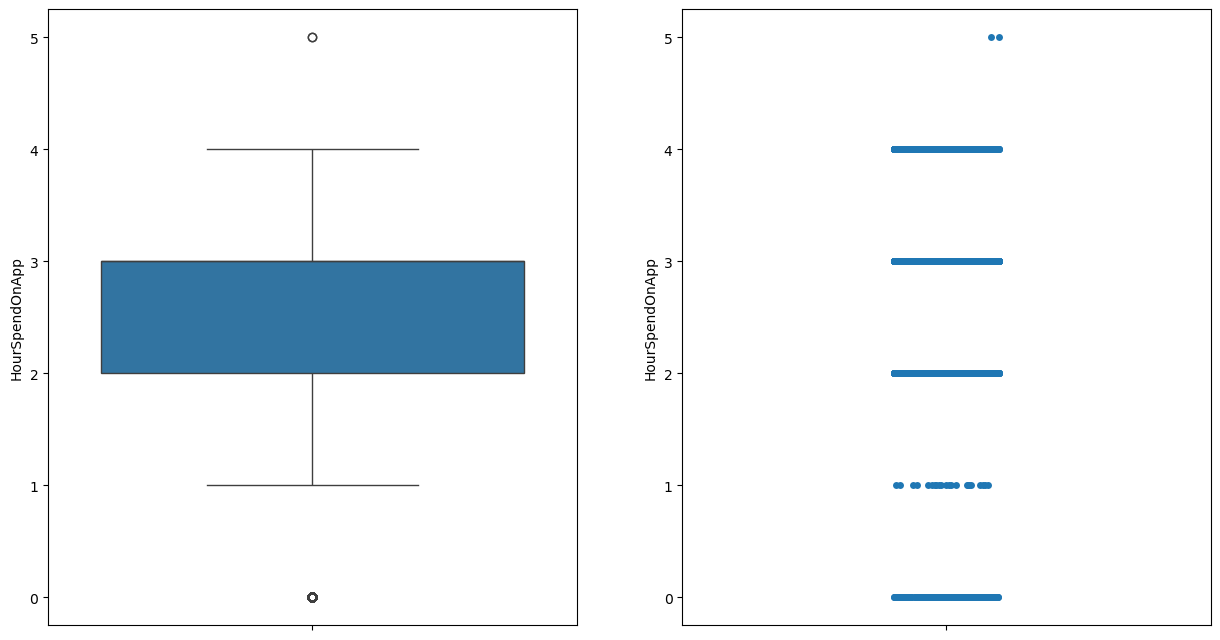

In [52]:
# Validar outliers

fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['HourSpendOnApp'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['HourSpendOnApp'], ax=fig.add_subplot(gs[0,1]))
plt.show()

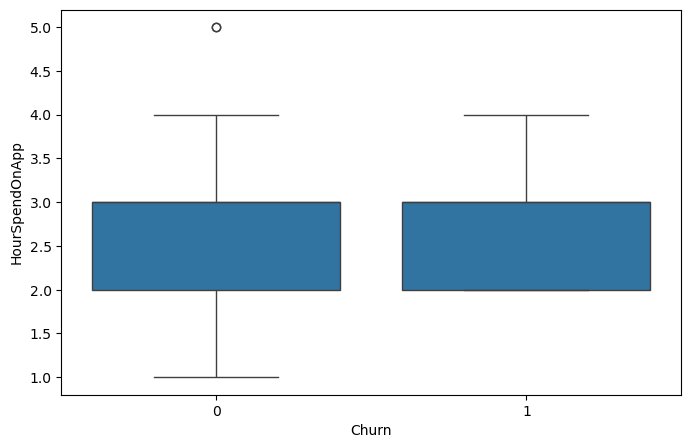

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['HourSpendOnApp'])
plt.show()

### NumberOfDeviceRegistered

Variável numérica discreta

In [54]:
x_train['NumberOfDeviceRegistered'].isnull().sum(), x_test['NumberOfDeviceRegistered'].isnull().sum()

(0, 0)

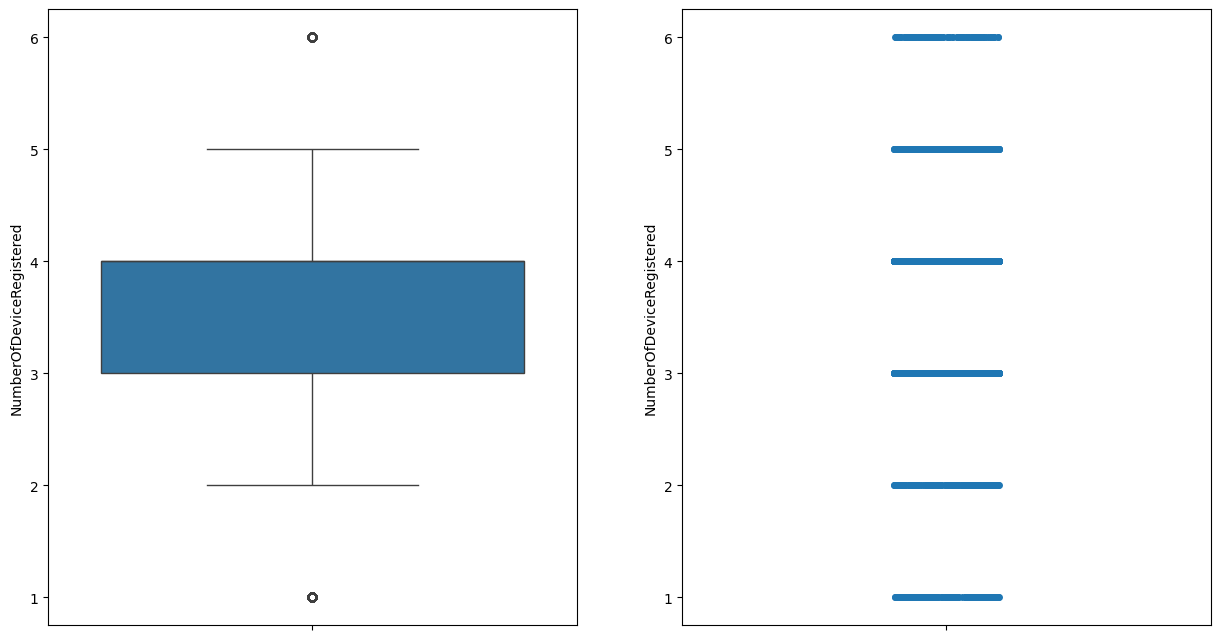

In [55]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['NumberOfDeviceRegistered'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['NumberOfDeviceRegistered'], ax=fig.add_subplot(gs[0,1]))
plt.show()

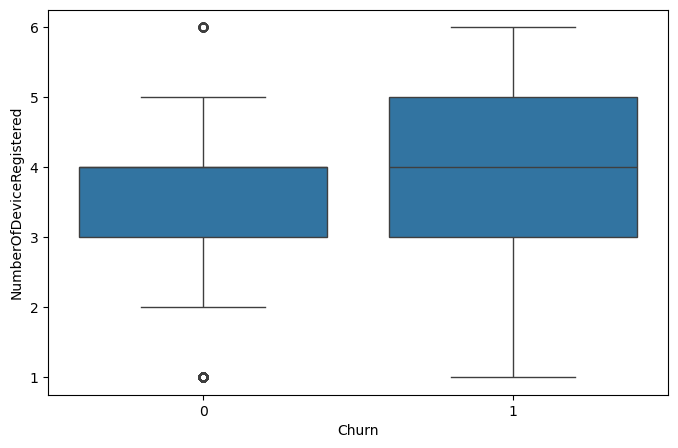

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['NumberOfDeviceRegistered'])
plt.show()

### PreferedOrderCat

Categoria preferida de pedido no ultimo mes

Variavel categórica nominal

In [57]:
x_train['PreferedOrderCat'].isnull().sum(), x_test['PreferedOrderCat'].isnull().sum()

(0, 0)

In [58]:
x_train['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1439
Mobile Phone           880
Fashion                577
Mobile                 577
Grocery                277
Others                 191
Name: count, dtype: int64

In [59]:
x_train['PreferedOrderCat_LaptopAndAcessory'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Laptop & Accessory" else 0)
x_train['PreferedOrderCat_MobilePhone'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile Phone" else 0)
x_train['PreferedOrderCat_Fashion'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Fashion" else 0)
x_train['PreferedOrderCat_Mobile'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile" else 0)
x_train['PreferedOrderCat_Grocery'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Grocery" else 0)
x_train['PreferedOrderCat_Others'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Others" else 0)
x_train.drop(columns = ['PreferedOrderCat'], inplace=True)

In [60]:
x_test['PreferedOrderCat_LaptopAndAcessory'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Laptop & Accessory" else 0)
x_test['PreferedOrderCat_MobilePhone'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile Phone" else 0)
x_test['PreferedOrderCat_Fashion'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Fashion" else 0)
x_test['PreferedOrderCat_Mobile'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile" else 0)
x_test['PreferedOrderCat_Grocery'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Grocery" else 0)
x_test['PreferedOrderCat_Others'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Others" else 0)
x_test.drop(columns = ['PreferedOrderCat'], inplace=True)

### SatisfactionScore

Satisfação do cliente

Variável numérica discreta

In [61]:
x_train['SatisfactionScore'].isnull().sum(), x_test['SatisfactionScore'].isnull().sum()

(0, 0)

In [62]:
x_train['SatisfactionScore'].value_counts()

SatisfactionScore
3    1181
5     811
1     787
4     744
2     418
Name: count, dtype: int64

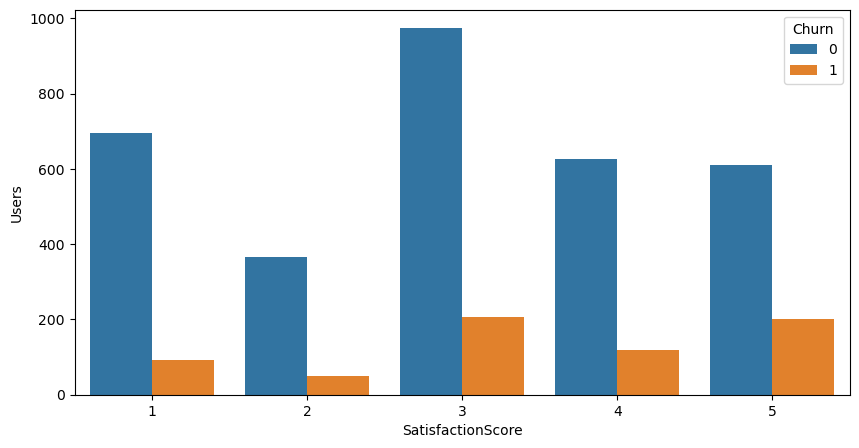

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['SatisfactionScore'], hue=train['Churn'])
plt.ylabel('Users')
plt.show()

### MaritalStatus

In [64]:
x_train['MaritalStatus'].isnull().sum(), x_test['MaritalStatus'].isnull().sum()

(0, 0)

In [65]:
x_train['MaritalStatus'].value_counts()

MaritalStatus
Married     2085
Single      1252
Divorced     604
Name: count, dtype: int64

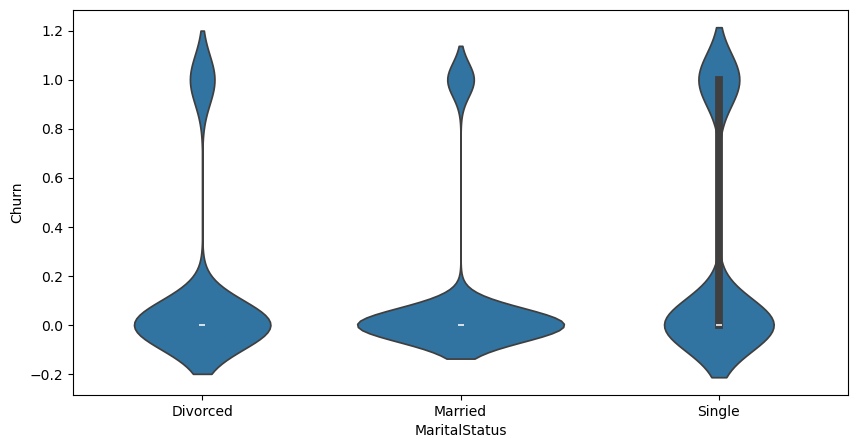

In [66]:
plt.figure(figsize=(10,5))
sns.violinplot(x=train['MaritalStatus'], y=train['Churn'])
plt.show()

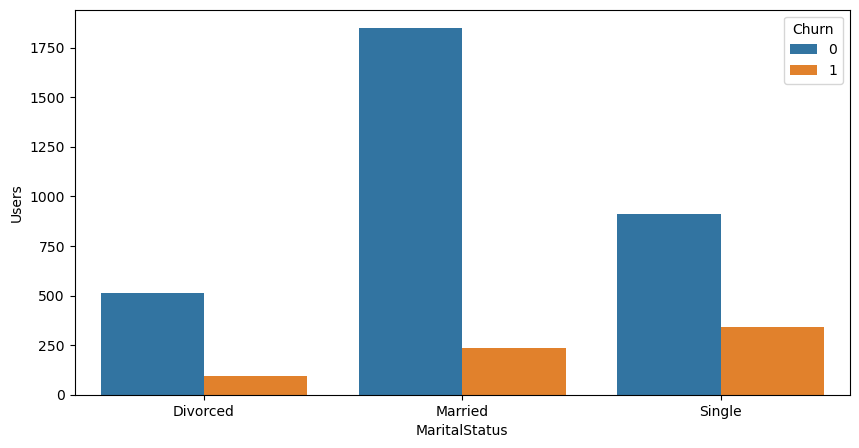

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['MaritalStatus'], hue=train['Churn'])
plt.ylabel('Users')
plt.show()

In [68]:
x_train['MaritalStatus_Single'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Single" else 0)
x_train['MaritalStatus_Divorced'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Divorced" else 0)
x_train['MaritalStatus_Married'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Married" else 0)
x_train.drop(columns = ['MaritalStatus'], inplace=True)

In [69]:
x_test['MaritalStatus_Single'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Single" else 0)
x_test['MaritalStatus_Divorced'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Divorced" else 0)
x_test['MaritalStatus_Married'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Married" else 0)
x_test.drop(columns = ['MaritalStatus'], inplace=True)

### NumberOfAddress

total de endereços cadastrados pelos usuários

Variável numérica discreta

In [70]:
x_train['NumberOfAddress'].isnull().sum(), x_test['NumberOfAddress'].isnull().sum()

(0, 0)

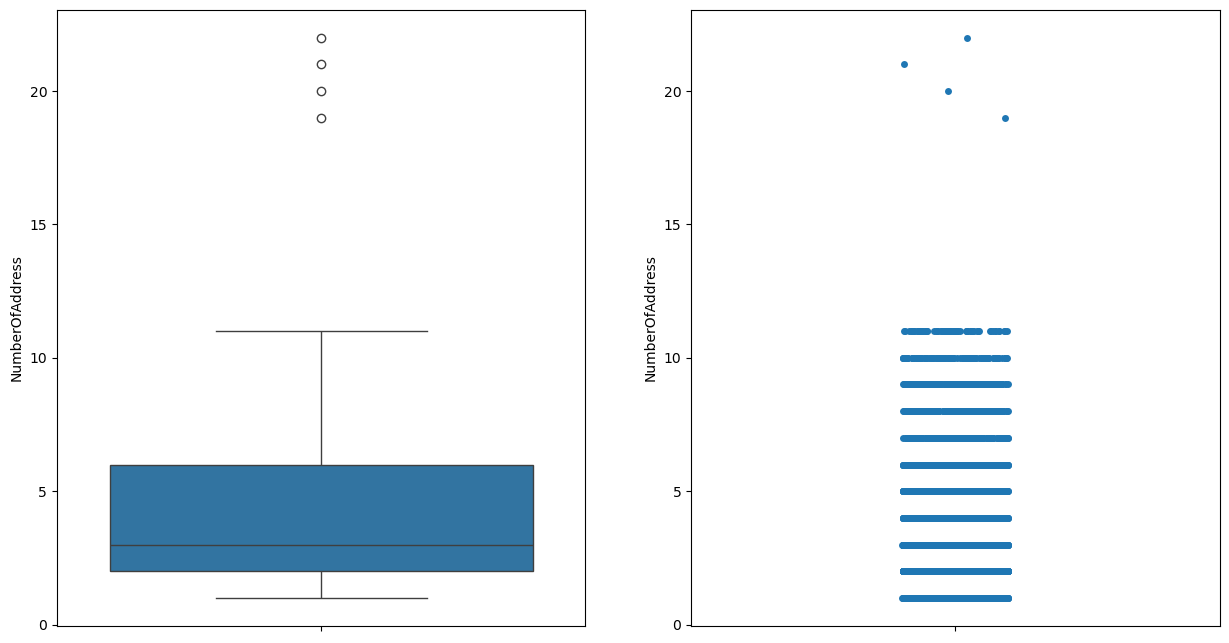

In [71]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['NumberOfAddress'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['NumberOfAddress'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [72]:
x_train.NumberOfAddress.sort_values(ascending=False).head(5)

3506    22
691     21
3075    20
260     19
2884    11
Name: NumberOfAddress, dtype: int64

In [73]:
x_test.NumberOfAddress.sort_values(ascending=False).head(5)

4600    11
4877    11
5107    11
4450    11
3446    11
Name: NumberOfAddress, dtype: int64

In [74]:
#substituição de outliers pelo máximo observado (11)
x_train.NumberOfAddress = np.where(x_train.NumberOfAddress > 15, 11, x_train.NumberOfAddress)
x_test.NumberOfAddress = np.where(x_test.NumberOfAddress > 15, 11, x_test.NumberOfAddress)

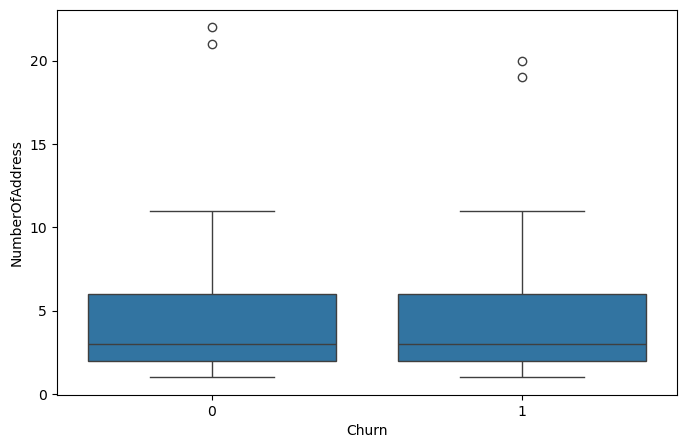

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['NumberOfAddress'])
plt.show()

In [76]:
train[['NumberOfAddress', 'Churn']].corr()

,NumberOfAddress,Churn
NumberOfAddress,1.000000,0.033151
Churn,0.033151,1.000000


### Complain

se o usuário abriu uma reclamação no último mês

Variável numérica nominal

In [77]:
x_train['Complain'].isnull().sum(), x_test['Complain'].isnull().sum()

(0, 0)

In [78]:
x_train['Complain'].value_counts()

Complain
0    2804
1    1137
Name: count, dtype: int64

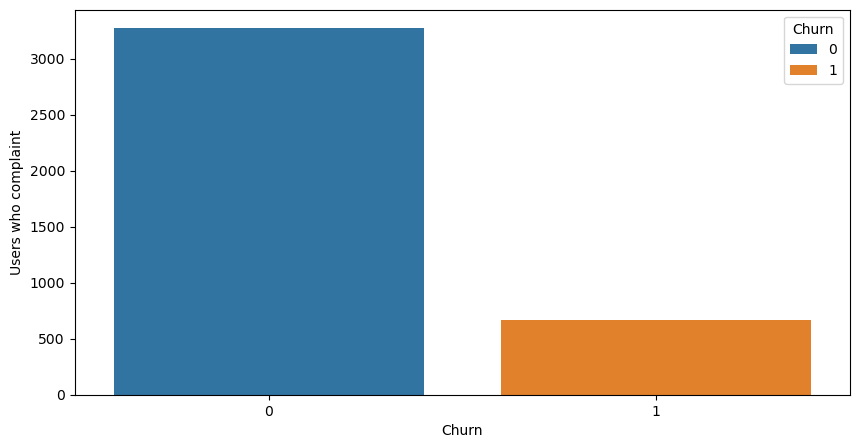

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Churn'], hue=train['Churn'])
plt.ylabel('Users who complaint')
plt.show()

### OrderAmountHikeFromlastYear

porcentagem de crescimento de pedidos do ano passado para esse ano

In [80]:
x_train['OrderAmountHikeFromlastYear'].isnull().sum(), x_test['OrderAmountHikeFromlastYear'].isnull().sum()

(185, 80)

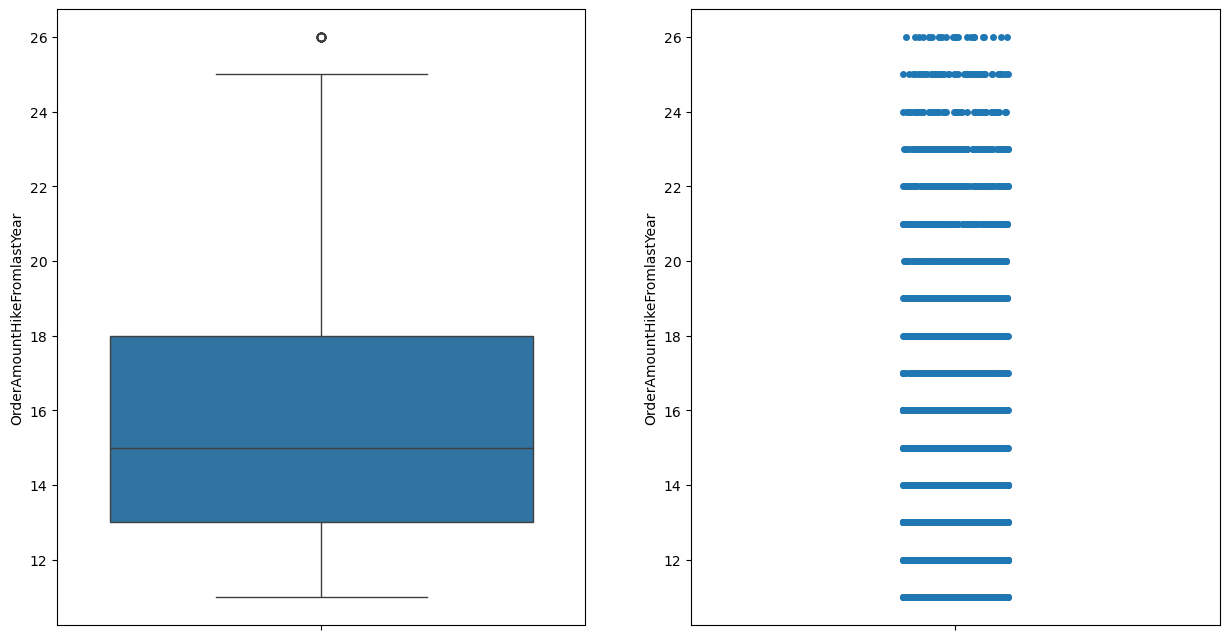

In [81]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,1]))
plt.show()

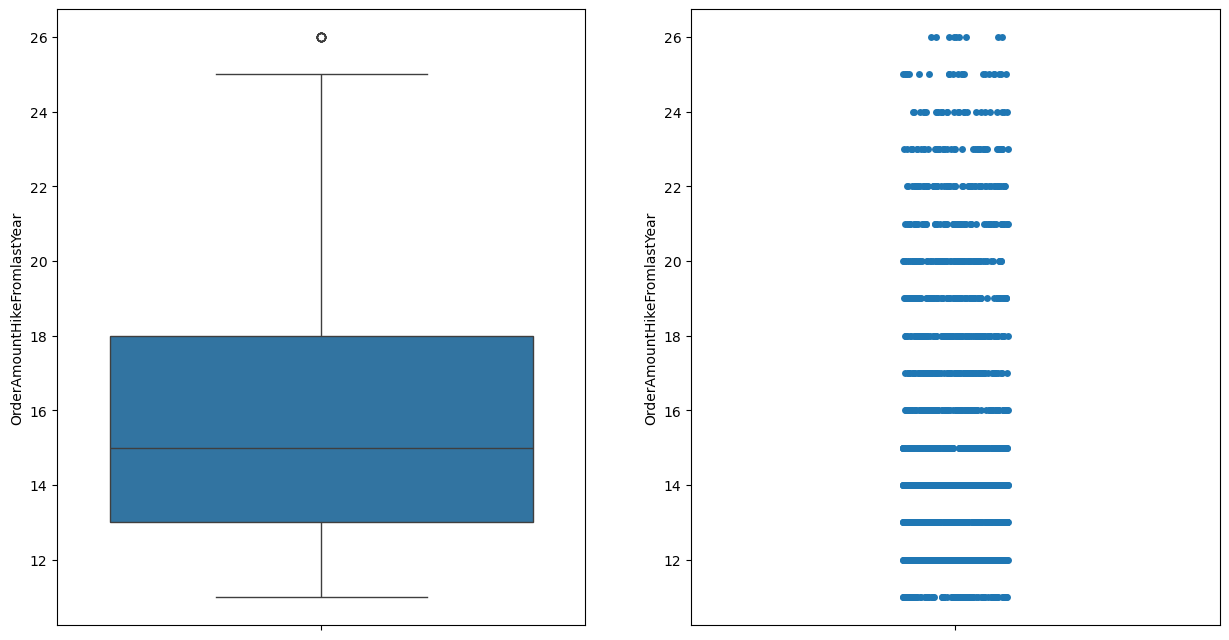

In [82]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_test['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_test['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [83]:
## Tratamento dos dados nulos 

# Entendendo valor mínimo e máximo do dataset
x_train['OrderAmountHikeFromlastYear'].min(), x_train['OrderAmountHikeFromlastYear'].max()

## Considerar como 0 (considerar que não teve pedido do ano passado para este ano)
x_train['OrderAmountHikeFromlastYear'] = x_train['OrderAmountHikeFromlastYear'].fillna(0)
x_test['OrderAmountHikeFromlastYear'] = x_test['OrderAmountHikeFromlastYear'].fillna(0)

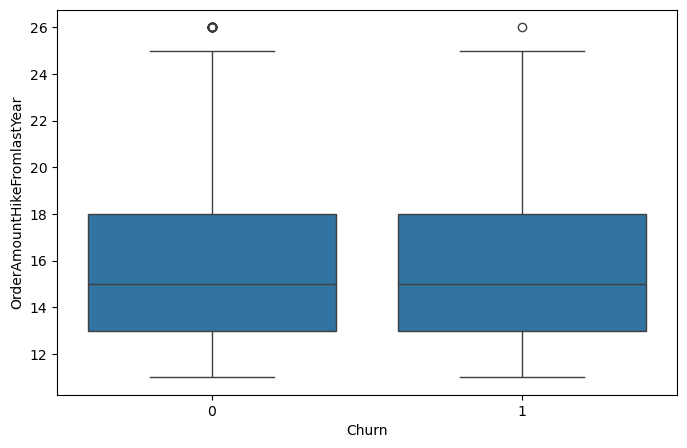

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['OrderAmountHikeFromlastYear'])
plt.show()

### CouponUsed

Variável numérica discreta

In [85]:
x_train['CouponUsed'].isnull().sum(), x_test['CouponUsed'].isnull().sum()

(171, 85)

In [86]:
# substituir nulos por 0 (supondo que não usou cupom)

x_train['CouponUsed'] = x_train['CouponUsed'].fillna(0)
x_test['CouponUsed'] = x_test['CouponUsed'].fillna(0)

In [87]:
x_train['CouponUsed'].value_counts()

CouponUsed
1.0     1496
2.0      899
0.0      893
3.0      232
4.0      130
5.0       82
6.0       72
7.0       60
8.0       26
10.0      13
11.0      11
9.0        8
13.0       7
12.0       7
14.0       3
15.0       1
16.0       1
Name: count, dtype: int64

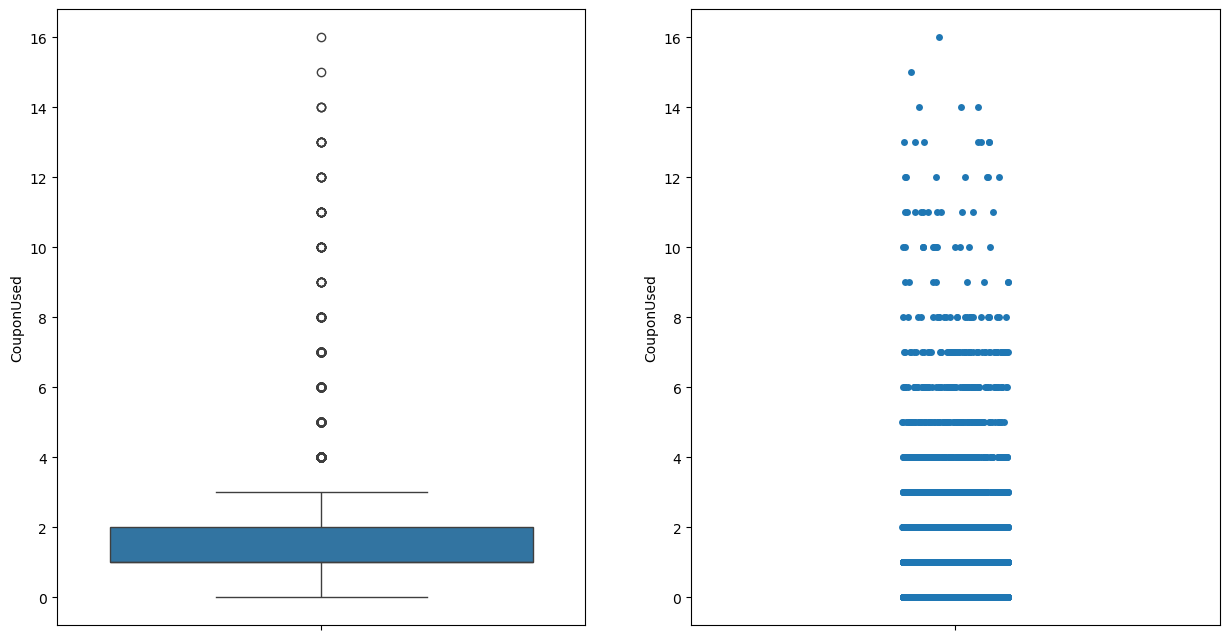

In [88]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['CouponUsed'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['CouponUsed'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [89]:
x_train[x_train['CouponUsed'] > x_train['OrderCount']]

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Cash,PreferedOrderCat_LaptopAndAcessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Fashion,PreferedOrderCat_Mobile,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married


### OrderCount

In [90]:
x_train['OrderCount'].isnull().sum(), x_test['OrderCount'].isnull().sum()

(181, 77)

In [91]:
## verificar se existe usuários com numero de compras nulo e que usaram cupom (o que não faz sentido já que você só poderia ter utilizado cupom se tiver feito pedido)
x_train[x_train.OrderCount.isnull()==True]['CouponUsed']

4896    2.0
5622    4.0
4701    1.0
3503    8.0
4784    1.0
       ... 
762     0.0
120     1.0
2183    2.0
1202    1.0
4455    4.0
Name: CouponUsed, Length: 181, dtype: float64

In [92]:
x_train['OrderCount'] = np.where(x_train.OrderCount.isnull()==True, x_train.CouponUsed, x_train.OrderCount)
x_test['OrderCount'] = np.where(x_test.OrderCount.isnull()==True, x_test.CouponUsed, x_test.OrderCount)

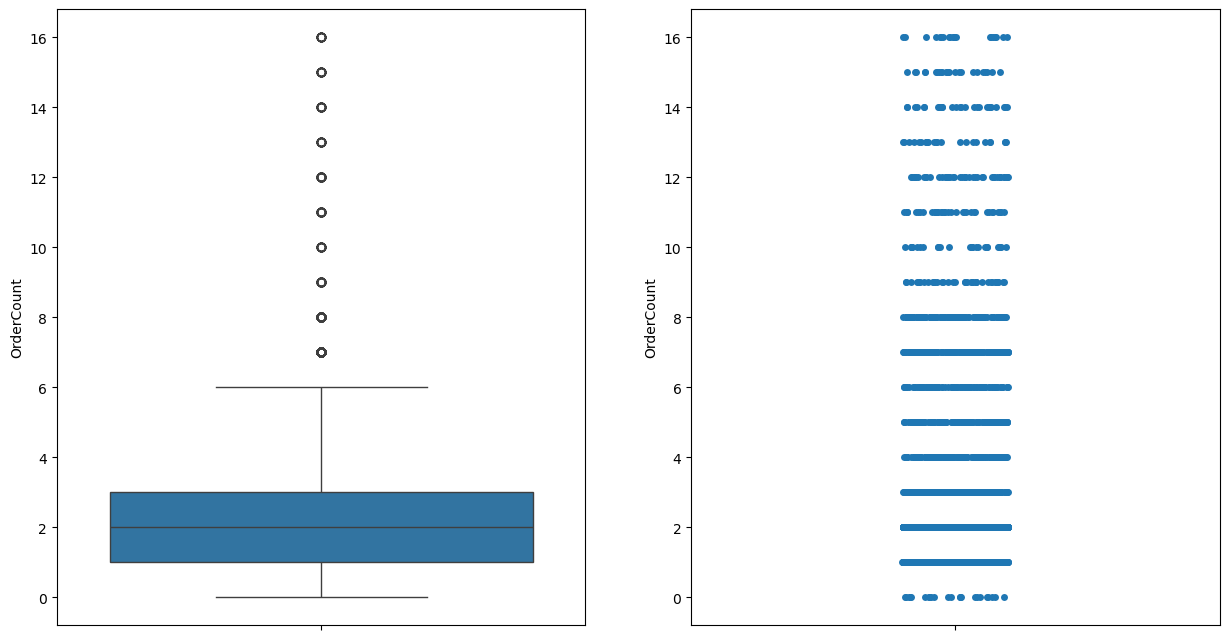

In [93]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['OrderCount'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['OrderCount'], ax=fig.add_subplot(gs[0,1]))
plt.show()

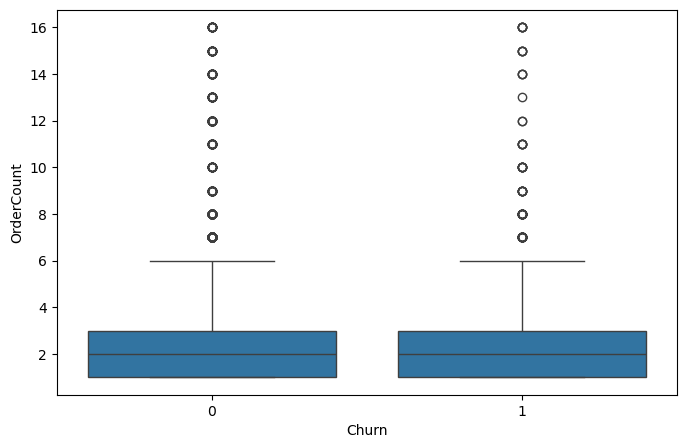

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['OrderCount'])
plt.show()

In [95]:
train[['Churn', 'OrderCount']].corr()

,Churn,OrderCount
Churn,1.000000,-0.020403
OrderCount,-0.020403,1.000000


### DaySinceLastOrder

dias desde a última compra

Variável numérica discreta

In [96]:
x_train['DaySinceLastOrder'].isnull().sum(), x_test['DaySinceLastOrder'].isnull().sum()

(220, 87)

In [97]:
# verifica se há usuários que não possuem dia da última compra (ou seja nunca compraram) e possuem pedidos. 
# Em tese não faria sentido um usuário ter pedido mas seu ultimo pedido não ser registrado
x_train[x_train['DaySinceLastOrder'].isnull()==True]['OrderCount']

5279     8.0
2868    16.0
3716     2.0
5147     4.0
3056     8.0
        ... 
3572     8.0
4012     5.0
4631     2.0
5529     3.0
2081     4.0
Name: OrderCount, Length: 220, dtype: float64

In [98]:
x_train['DaySinceLastOrder'].median()

3.0

In [99]:
# sunbstituindo valores nulos pela mediana. 
x_train['DaySinceLastOrder'] = x_train['DaySinceLastOrder'].fillna(x_train['DaySinceLastOrder'].median())
x_test['DaySinceLastOrder'] = x_test['DaySinceLastOrder'].fillna(x_test['DaySinceLastOrder'].median())

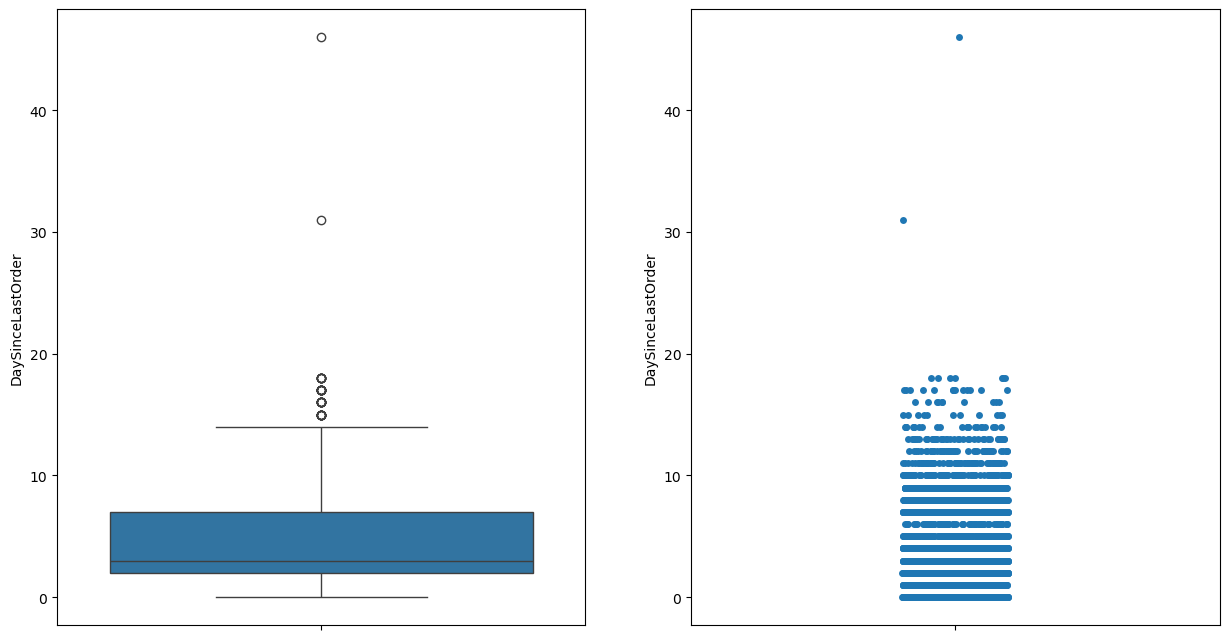

In [100]:
## Validar usuários

fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['DaySinceLastOrder'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['DaySinceLastOrder'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [101]:
x_train[x_train['DaySinceLastOrder'] >=30][['DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'CashbackAmount']]

,DaySinceLastOrder,OrderCount,CouponUsed,CashbackAmount
4305,31.0,3.0,1.0,157.04
2040,46.0,11.0,5.0,206.09


In [102]:
x_test[x_test['DaySinceLastOrder'] >=30][['DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'CashbackAmount']]

,DaySinceLastOrder,OrderCount,CouponUsed,CashbackAmount
1490,30.0,2.0,0.0,132.04


In [103]:
x_train['DaySinceLastOrder'] = np.where(x_train['DaySinceLastOrder'] > 30, 30, x_train['DaySinceLastOrder'])
x_test['DaySinceLastOrder'] = np.where(x_test['DaySinceLastOrder'] > 30, 30, x_test['DaySinceLastOrder'])

### CashbackAmount

Quantidade de cashback recebido no último mês

In [104]:
x_train['CashbackAmount'].isnull().sum(), x_test['CashbackAmount'].isnull().sum()

(0, 0)

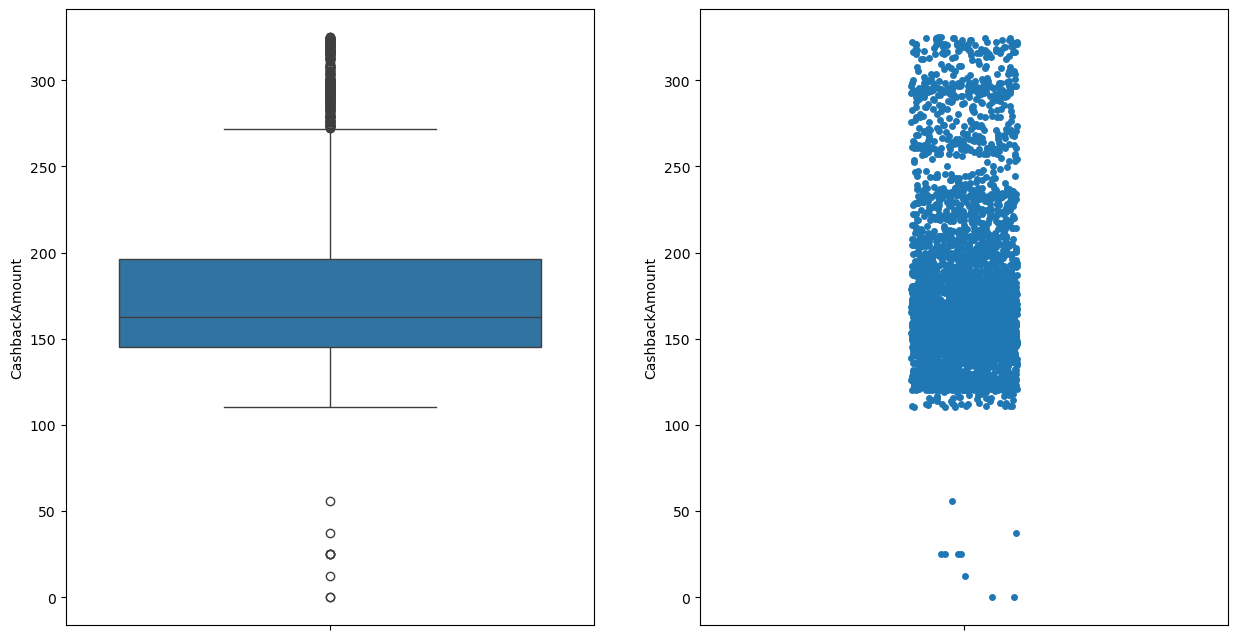

In [105]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['CashbackAmount'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['CashbackAmount'], ax=fig.add_subplot(gs[0,1]))
plt.show()

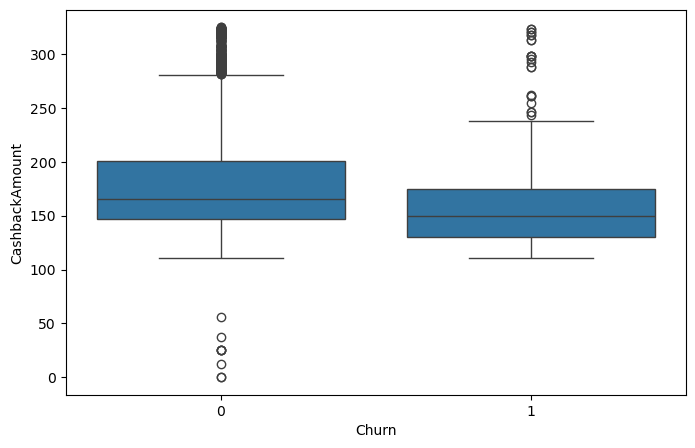

In [106]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['CashbackAmount'])
plt.show()

In [107]:
# verificar os usuários que não tem nenhum pedido mas em cashback maior que 0
x_train[x_train['OrderCount'] ==0][['OrderCount', 'CouponUsed', 'CashbackAmount']]

,OrderCount,CouponUsed,CashbackAmount
2355,0.0,0.0,247.32
1620,0.0,0.0,236.03
1837,0.0,0.0,254.02
90,0.0,0.0,235.91
1693,0.0,0.0,259.92
1560,0.0,0.0,235.91
1307,0.0,0.0,237.44
2775,0.0,0.0,232.06
502,0.0,0.0,238.26
299,0.0,0.0,241.18


In [108]:
## substituir esses valores por 0

x_train['CashbackAmount'] = np.where((x_train['OrderCount'] == 0) & (x_train['CashbackAmount'] > 0), 2, x_train['CashbackAmount'])
x_test['CashbackAmount'] = np.where((x_test['OrderCount'] == 0) & (x_test['CashbackAmount'] > 0), 2, x_test['CashbackAmount'])

### Correlação entre as variáveis

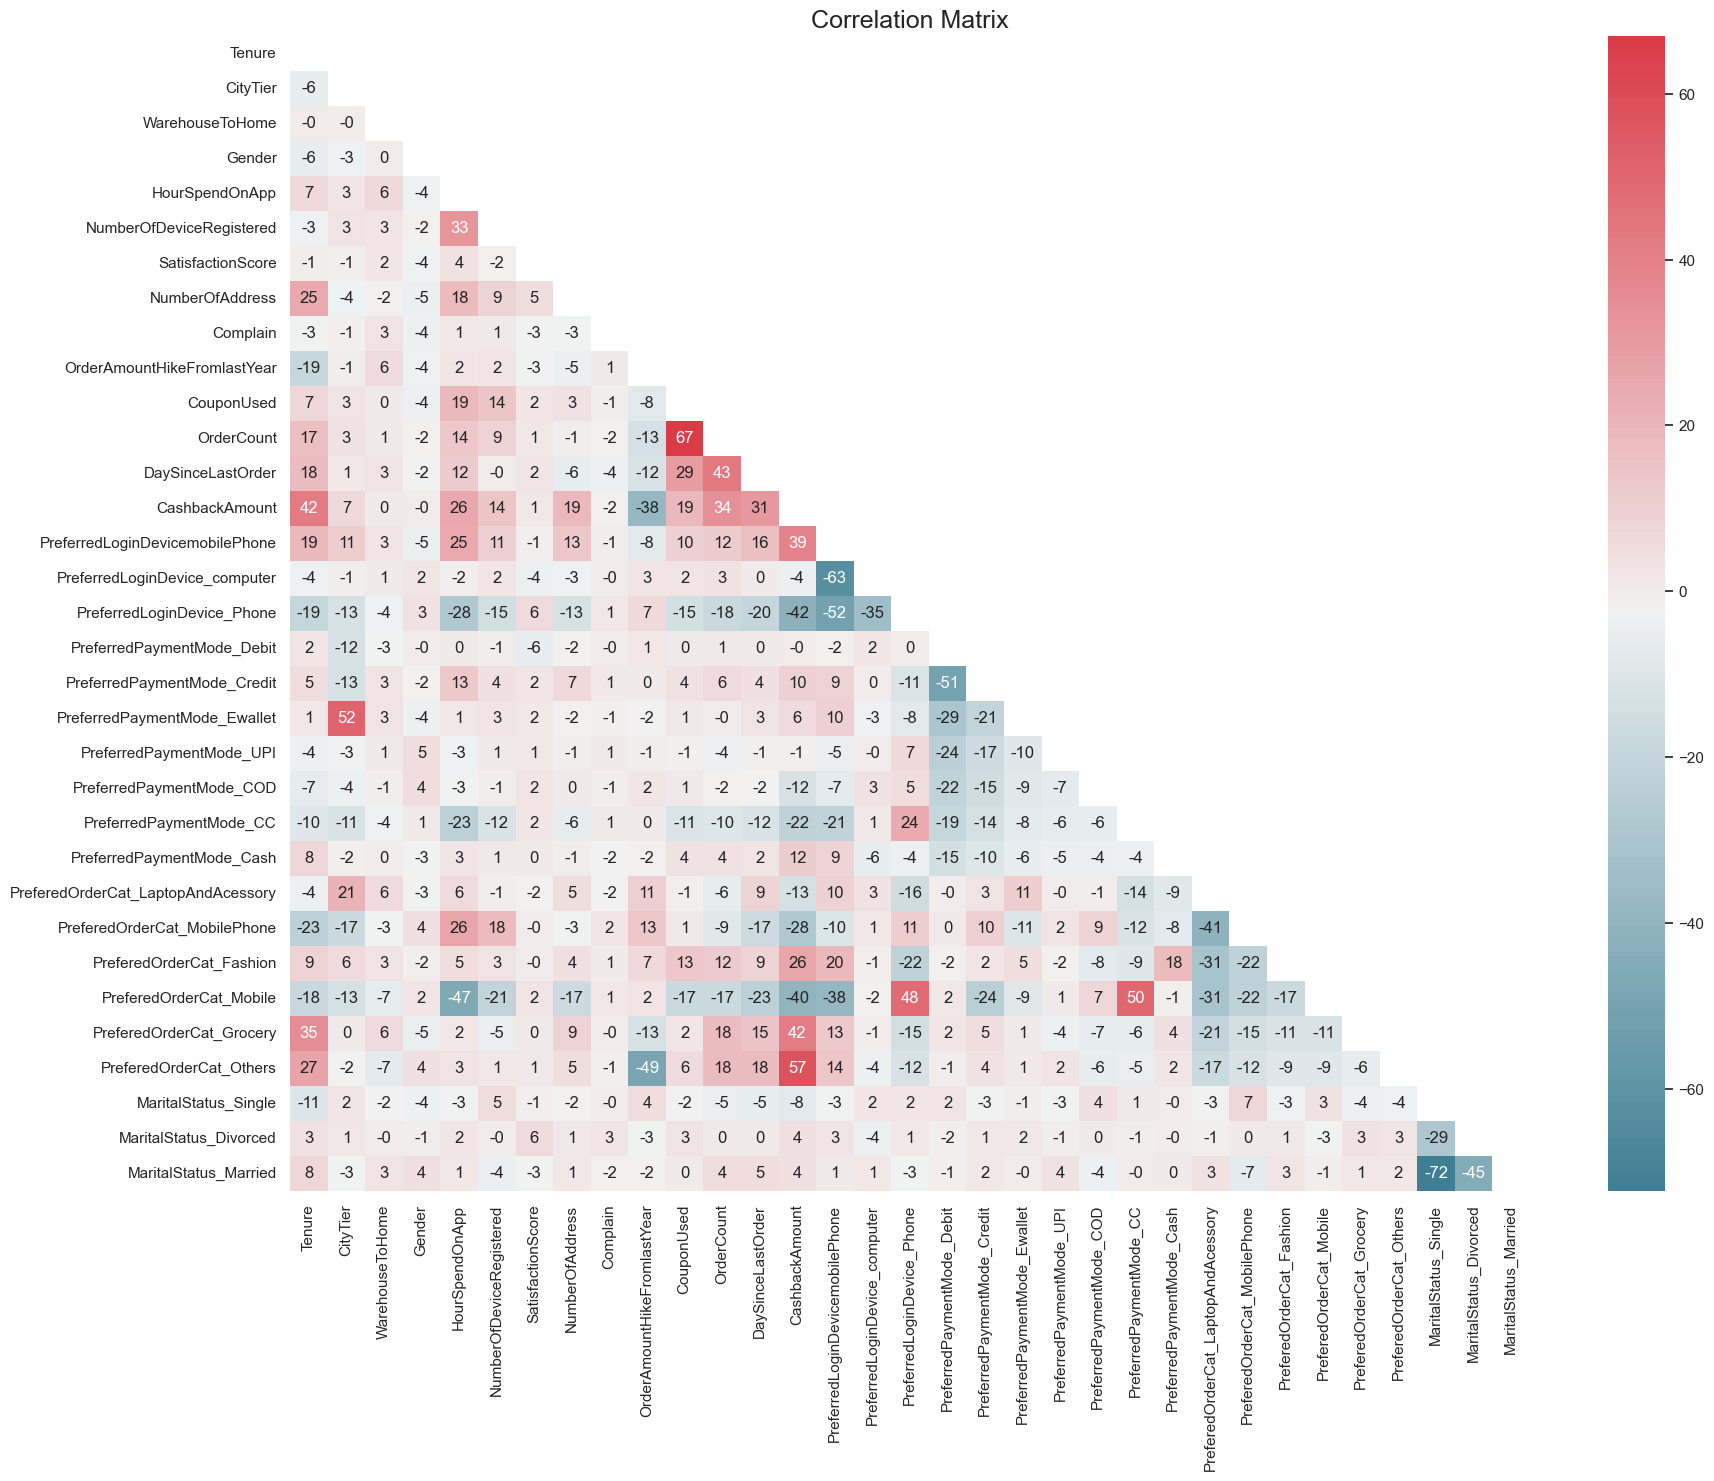

In [109]:
sns.set(style="white")

corr = 100*x_train.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool_))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".0f")

plt.show()